In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_excel("World military power.xlsx")

In [3]:
df

Military Strength  Military Strength Power Index Aircraft Strength  \
0         Afghanistan                         1.3444       Afghanistan   
1             Albania                         2.3137           Albania   
2             Algeria                         0.4659           Algeria   
3              Angola                         0.8379            Angola   
4           Argentina                         0.6521         Argentina   
..                ...                            ...               ...   
133         Venezuela                         0.6449         Venezuela   
134           Vietnam                         0.3559           Vietnam   
135             Yemen                         1.2412             Yemen   
136            Zambia                         1.6464            Zambia   
137          Zimbabwe                         1.7577          Zimbabwe   

     Aircraft Strength value Fighter/Interceptor Strength  \
0                        260                  Afghanistan   
1                         19                      Albania   
2                        551                      Algeria   
3                        295                       Angola   
4                        227                    Argentina   
..                       ...                          ...   
133                      260                    Venezuela   
134                      293                      Vietnam   
135                      169                        Yemen   
136                      108                       Zambia   
137                       90                     Zimbabwe   

     Fighter/Interceptor Strength value Attack Aircraft Strength  \
0                                     0              Afghanistan   
1                                     0                  Albania   
2                                   103                  Algeria   
3                                    72                   Angola   
4                                    24                Argentina   
..                                  ...                      ...   
133                                  38                Venezuela   
134                                  77                  Vietnam   
135                                  77                    Yemen   
136                                  18                   Zambia   
137                                  10                 Zimbabwe   

     Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
0                                25                       Afghanistan   
1                                 0                           Albania   
2                                22                           Algeria   
3                                18                            Angola   
4                                 7                         Argentina   
..                              ...                               ...   
133                               0                         Venezuela   
134                               0                           Vietnam   
135                               0                             Yemen   
136                               0                            Zambia   
137                               0                          Zimbabwe   

     Transport Aircraft Fleet Strength value  ... Total Population  \
0                                         30  ...      Afghanistan   
1                                          0  ...          Albania   
2                                         59  ...          Algeria   
3                                         30  ...           Angola   
4                                          9  ...        Argentina   
..                                       ...  ...              ...   
133                                       52  ...        Venezuela   
134                                       38  ...          Vietnam   
135                                        8  ...         

In [4]:
real_df = df.iloc[:,  range(1, len(df.columns),2)]
real_df["Country"] = df.iloc[:,0]

C:\Users\hskay\AppData\Local\Temp\ipykernel_21476\2171788349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df["Country"] = df.iloc[:,0]


In [5]:
real_df.head().T

0               1  \
Military Strength Power Index                     1.3444          2.3137   
Aircraft Strength value                              260              19   
Fighter/Interceptor Strength value                     0               0   
Attack Aircraft Strength value                        25               0   
Transport Aircraft Fleet Strength value               30               0   
Trainer Aircraft Fleet value                           0               0   
Helicopter Fleet Strength value                      187              19   
Attack Helicopter Fleet Strength value                 0               0   
Tank Strength value                                    0               0   
AFV/APC Strength value                              1062             467   
Self-Propelled Artillery Strength value                0               0   
Towed Artillery Strength value                       176               0   
Rocket Projector Strength value                       50               0   
Navy Fleet Strengths value                           0.0            38.0   
Aircraft Carrier Fleet Strength value                0.0             0.0   
Submarine Fleet Strength value                       0.0             0.0   
Destroyer Fleet Strength value                       0.0             0.0   
Frigate Fleet Strength value                         0.0             0.0   
defense spending budget value            12,00,00,00,000    25,00,00,000   
External Debt value                       2,84,00,00,000  9,50,50,00,000   
Airport Totals value                                  43               4   
Oil Production value                                   0           16000   
Oil Consumption value                               5500           42500   
Proven Oil Reserves value                              0    16,83,00,000   
Available Manpower value                     1,43,25,743       15,19,438   
Total Population value                       3,49,40,837       30,57,220   
Total Square Land Area value                    6,52,230           28748   
Total Coastline Coverage value                         0             362   
Total Waterway Coverage value                       1200              41   
Total Border Coverage value                       5987.0           691.0   
Country                                      Afghanistan         Albania   

                                                       2                3  \
Military Strength Power Index                     0.4659           0.8379   
Aircraft Strength value                              551              295   
Fighter/Interceptor Strength value                   103               72   
Attack Aircraft Strength value                        22               18   
Transport Aircraft Fleet Strength value               59               30   
Trainer Aircraft Fleet value                          87               47   
Helicopter Fleet Strength value                      257              126   
Attack Helicopter Fleet Strength value                45               15   
Tank Strength value                                  880              379   
AFV/APC Strength value                              7361              595   
Self-Propelled Artillery Strength value              320               28   
Towed Artillery Strength value                       240              357   
Rocket Projector Strength value                      316              115   
Navy Fleet Strengths value                         201.0             57.0   
Aircraft Carrier Fleet Strength value                0.0              0.0   
Submarine Fleet Strength value                       6.0              0.0   
Destroyer Fleet Strength value                       0.0              0.0   
Frigate Fleet Strength value                         5.0              0.0   
defense spending budget value            13,00,00,00,000   7,00,00,00,000   
External Debt value                       6,26,00,00,000  42,08,00,00,000   
Airpo

In [6]:
real_df = real_df.replace(',', '', regex=True)
real_df.iloc[:,:-1] = real_df.iloc[:,:-1].astype(float)

In [7]:
real_df.head().T

0             1  \
Military Strength Power Index                   1.3444        2.3137   
Aircraft Strength value                          260.0          19.0   
Fighter/Interceptor Strength value                 0.0           0.0   
Attack Aircraft Strength value                    25.0           0.0   
Transport Aircraft Fleet Strength value           30.0           0.0   
Trainer Aircraft Fleet value                       0.0           0.0   
Helicopter Fleet Strength value                  187.0          19.0   
Attack Helicopter Fleet Strength value             0.0           0.0   
Tank Strength value                                0.0           0.0   
AFV/APC Strength value                          1062.0         467.0   
Self-Propelled Artillery Strength value            0.0           0.0   
Towed Artillery Strength value                   176.0           0.0   
Rocket Projector Strength value                   50.0           0.0   
Navy Fleet Strengths value                         0.0          38.0   
Aircraft Carrier Fleet Strength value              0.0           0.0   
Submarine Fleet Strength value                     0.0           0.0   
Destroyer Fleet Strength value                     0.0           0.0   
Frigate Fleet Strength value                       0.0           0.0   
defense spending budget value            12000000000.0   250000000.0   
External Debt value                       2840000000.0  9505000000.0   
Airport Totals value                              43.0           4.0   
Oil Production value                               0.0       16000.0   
Oil Consumption value                           5500.0       42500.0   
Proven Oil Reserves value                          0.0   168300000.0   
Available Manpower value                    14325743.0     1519438.0   
Total Population value                      34940837.0     3057220.0   
Total Square Land Area value                  652230.0       28748.0   
Total Coastline Coverage value                     0.0         362.0   
Total Waterway Coverage value                   1200.0          41.0   
Total Border Coverage value                     5987.0         691.0   
Country                                    Afghanistan       Albania   

                                                     2              3  \
Military Strength Power Index                   0.4659         0.8379   
Aircraft Strength value                          551.0          295.0   
Fighter/Interceptor Strength value               103.0           72.0   
Attack Aircraft Strength value                    22.0           18.0   
Transport Aircraft Fleet Strength value           59.0           30.0   
Trainer Aircraft Fleet value                      87.0           47.0   
Helicopter Fleet Strength value                  257.0          126.0   
Attack Helicopter Fleet Strength value            45.0           15.0   
Tank Strength value                              880.0          379.0   
AFV/APC Strength value                          7361.0          595.0   
Self-Propelled Artillery Strength value          320.0           28.0   
Towed Artillery Strength value                   240.0          357.0   
Rocket Projector Strength value                  316.0          115.0   
Navy Fleet Strengths value                       201.0           57.0   
Aircraft Carrier Fleet Strength value              0.0            0.0   
Submarine Fleet Strength value                     6.0            0.0   
Destroyer Fleet Strength value                     0.0            0.0   
Frigate Fleet Strength value                       5.0            0.0   
defense spending budget value            13000000000.0   7000000000.0   
External Debt value                       6260000000.0  42080000000.0   
Airport Totals value                             157.0          176.0   
Oil Production value                         1306000.0      1666000.0   
Oil Consumption value                         325000.0        82300.0

In [8]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans())
])

param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5],
    'kmeans__init': ['k-means++', 'random']
    }

In [9]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)

In [10]:
real_df[real_df.isnull().sum(axis = 1) > 0]

Military Strength Power Index  Aircraft Strength value  \
5                           2.1251                     64.0   
6                           0.3225                    464.0   
7                           0.9568                    120.0   
9                           1.8547                    109.0   
11                          0.8179                    202.0   
13                         10.1681                      2.0   
14                          0.9942                     69.0   
16                          2.0582                     45.0   
19                          1.9009                     16.0   
23                          3.2889                      3.0   
24                          1.6383                     35.0   
30                          0.5531                     95.0   
38                          0.8581                     86.0   
48                          0.8215                     47.0   
57                          0.1501                   1561.0   
62                          1.9244                      5.0   
63                          3.4433                     33.0   
69                          3.0869                      6.0   
71                          1.8941                     29.0   
74                          2.1291                      3.0   
75                          2.0299                      9.0   
81                          2.9891                     16.0   
83                          1.3684                     48.0   
85                          2.0153                     16.0   
88                          3.1808                     20.0   
93                          2.1898                     33.0   
95                          0.7852                    171.0   
103                         0.9479                    109.0   
105                         0.7966                    235.0   
106                         0.8466                     47.0   
110                         0.1509                   1649.0   
111                         2.3501                     19.0   
113                         1.4661                     77.0   
117                         0.5259                    169.0   
119                         0.4008                    744.0   
120                         1.8661                     25.0   
126                         1.6176                     48.0   
132                         0.8086                    185.0   
136                         1.6464                    108.0   
137                         1.7577                     90.0   

     Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
5                                   0.0                             9.0   
6                                  82.0                             6.0   
7                                  15.0                             0.0   
9                                  17.0                             0.0   
11                                 39.0                            68.0   
13                                  0.0                             0.0   
14                                  0.0                             0.0   
16                                 10.0                             0.0   
19                                  0.0                             3.0   
23                                  0.0                             0.0   
24                                  0.0                             6.0   
30                                 12.0                            16.0   
38                                 24.0                             0.0   
48                                 12.0                             0.0   
57                                279.0                            12.0   
62                                  0.0                             0.0   
63                                  0.0                             0.0   
69                                  0.0                             0.0

In [11]:
real_df["Navy Fleet Strengths value"].describe()

count    124.000000
mean      84.983871
std      146.114165
min        0.000000
25%       10.000000
50%       38.000000
75%       77.750000
max      984.000000
Name: Navy Fleet Strengths value, dtype: float64

In [12]:
real_df_t = real_df.iloc[:,:-1].fillna(real_df.iloc[:,:-1].mean())

In [13]:
real_df_t.isnull().sum().sum()

0

In [14]:
real_df_t["Country"] = real_df["Country"]

In [15]:
real_df_t.columns

Index(['Military Strength Power Index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'External Debt value', 'Airport Totals value', 'Oil Production value',
       'Oil Consumption value', 'Proven Oil Reserves value',
       'Available Manpower value', 'Total Population value',
       'Total Square Land Area value', 'Total Coastline Coverage value',
       '

In [16]:
grid_search.fit(real_df_t.iloc[:,:-1])
grid_search.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'kmeans__init': 'random', 'kmeans__n_clusters': 4}

In [17]:
real_df_t["Cluster"]=grid_search.best_estimator_.named_steps['kmeans'].labels_

In [18]:
import seaborn as sns

sns.pairplot(real_df_t, hue="Cluster")

In [19]:

correlation_matrix_real_df_t = real_df_t.iloc[:,:-2].corr()

In [20]:
plt.figure(figsize=(120, 100))
sns.heatmap(correlation_matrix_real_df_t, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
X = real_df_t.iloc[:,:-2].values

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

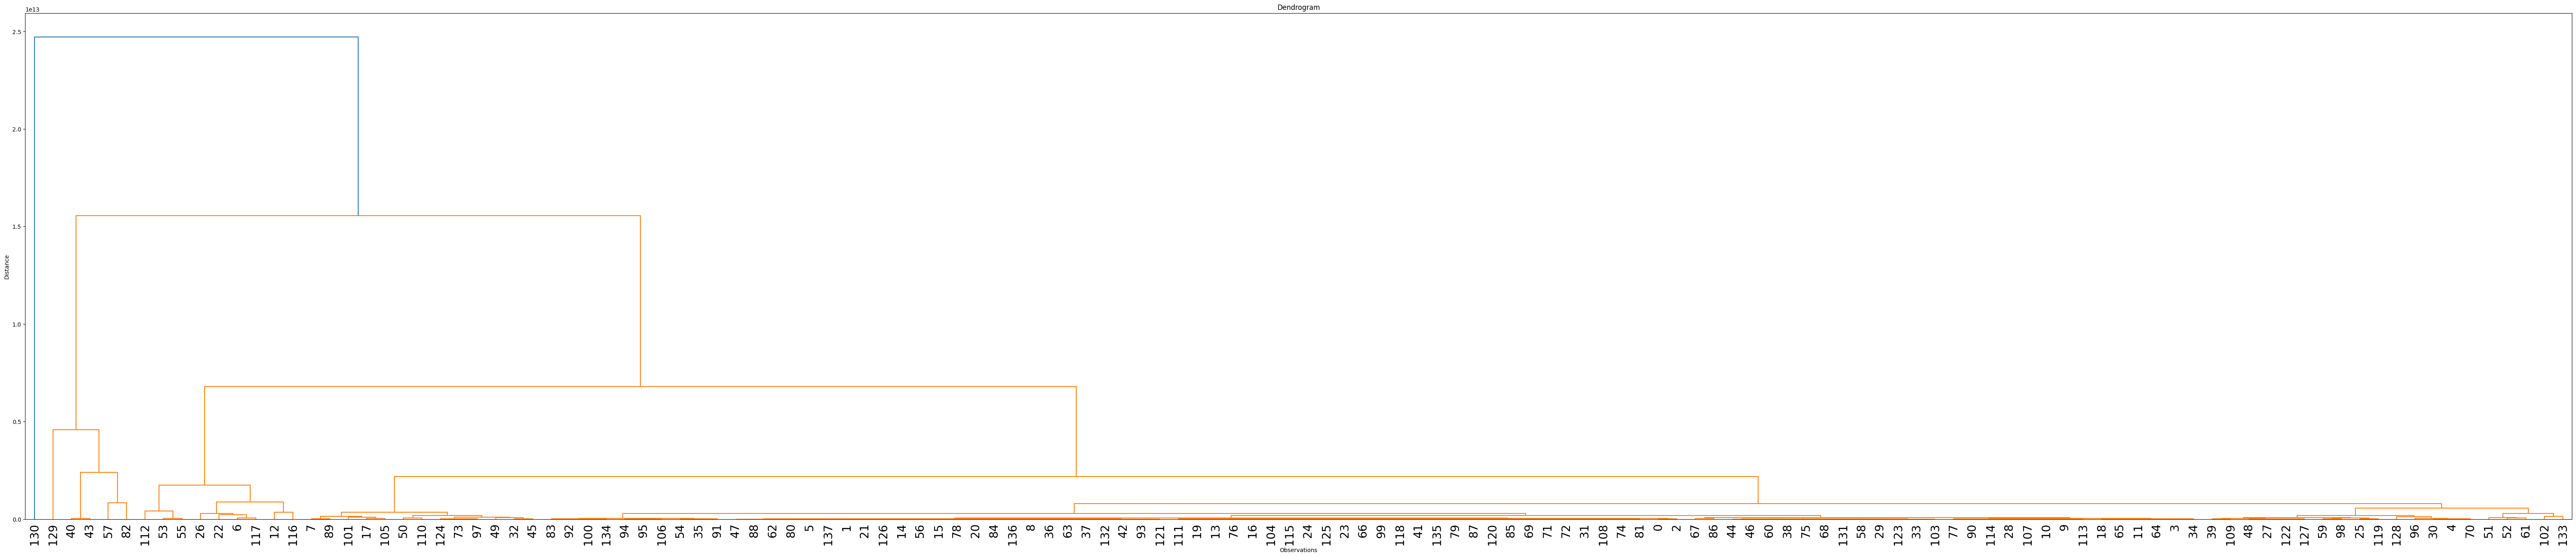

In [24]:
plt.figure(figsize = (80,16))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 20,);

In [25]:
real_df_t.loc[130,"Country"]

'United States'

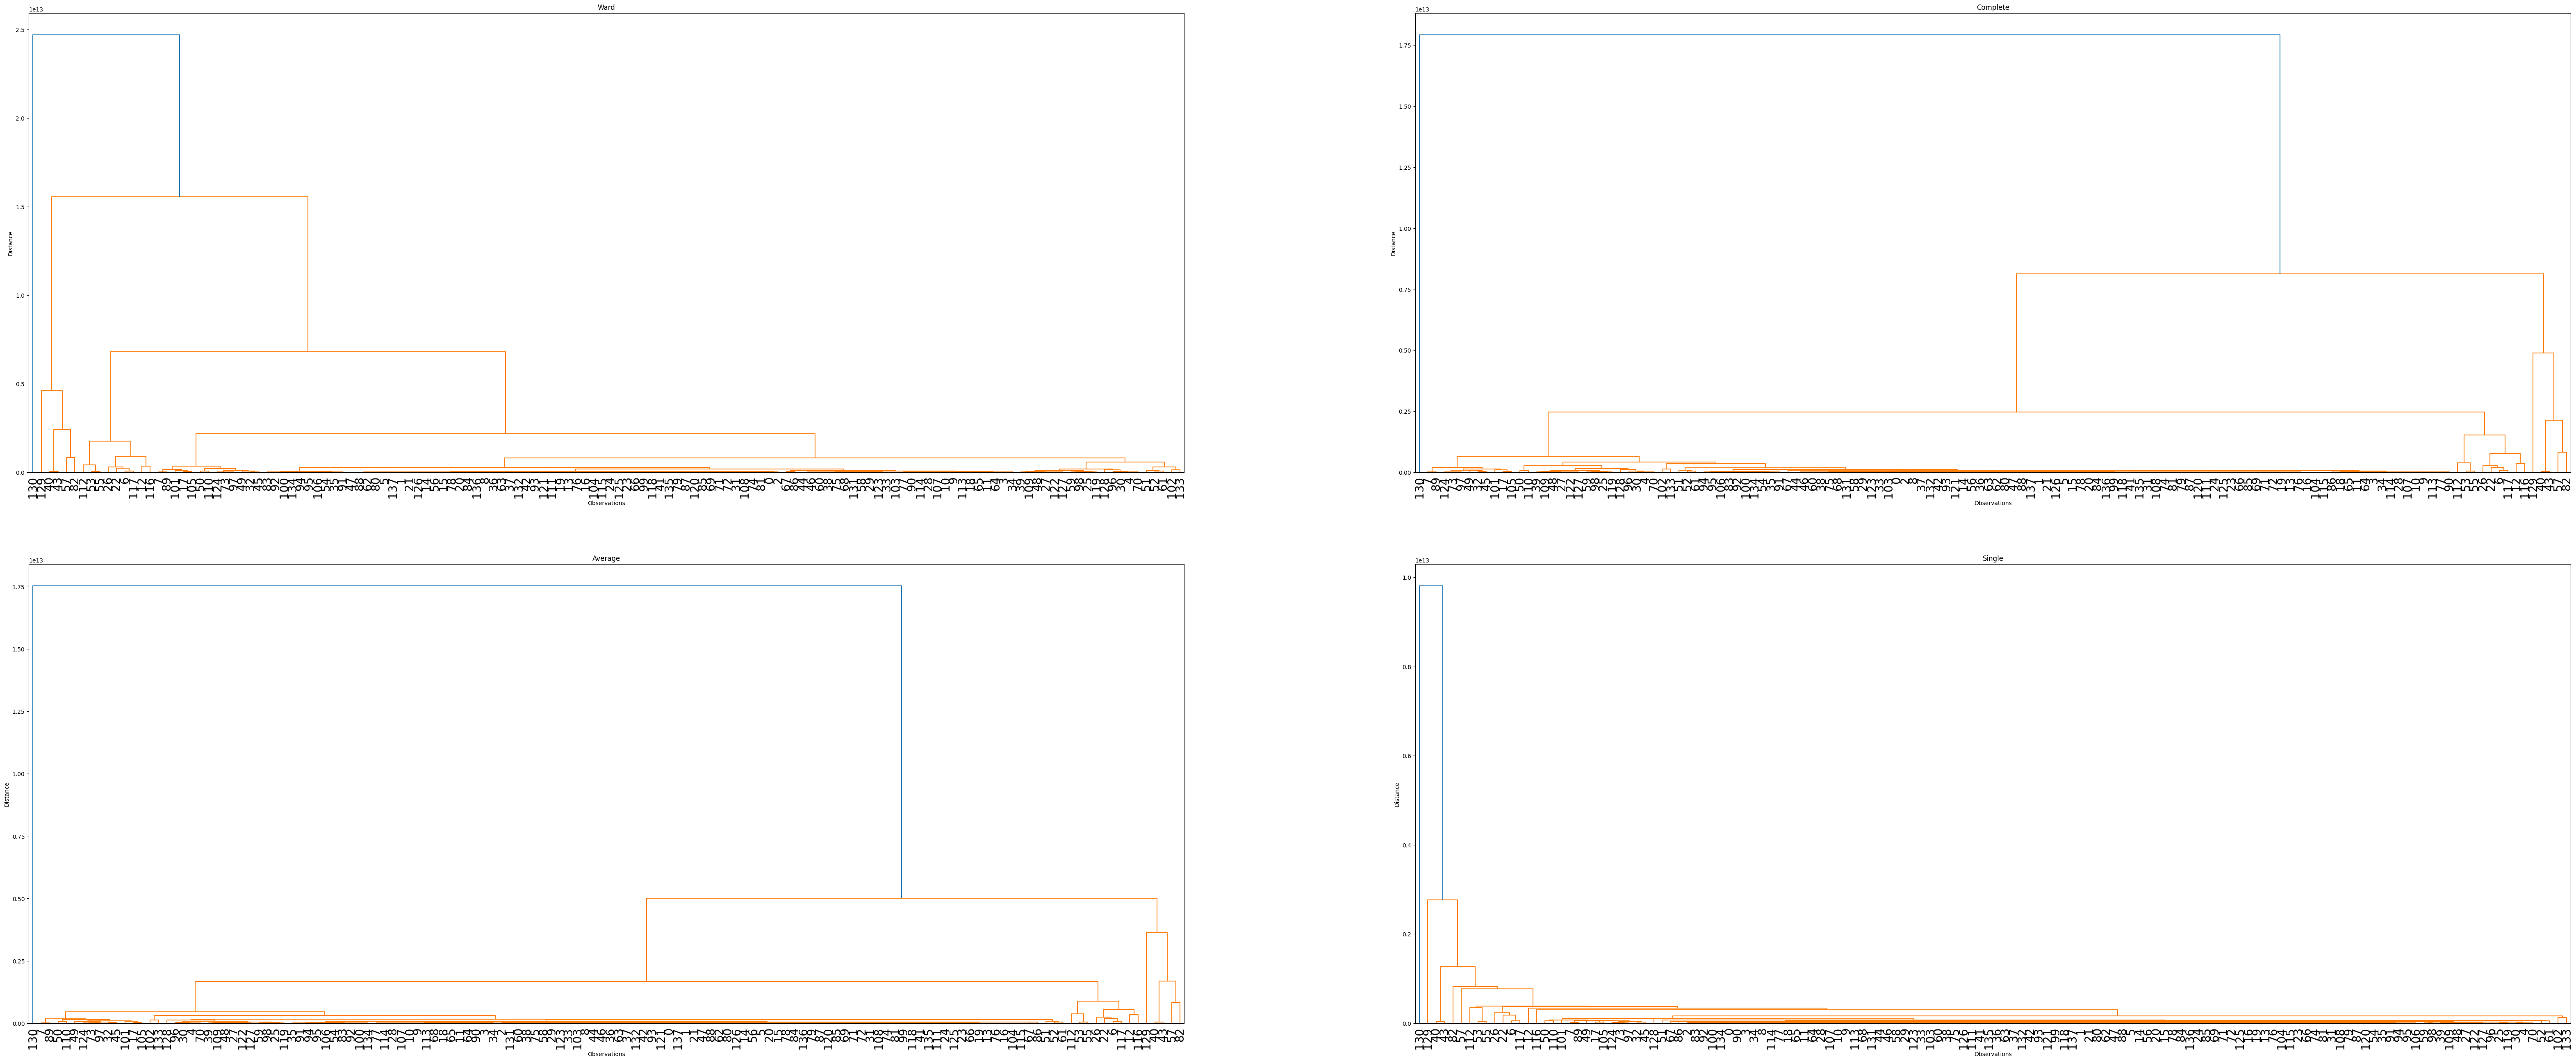

In [26]:
plt.figure(figsize = (80,32))
plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 20)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 20)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 20)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 20);

In [27]:
X = real_df_t.iloc[:,:-2].values
X = np.delete(X, 130, axis=0)

In [28]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

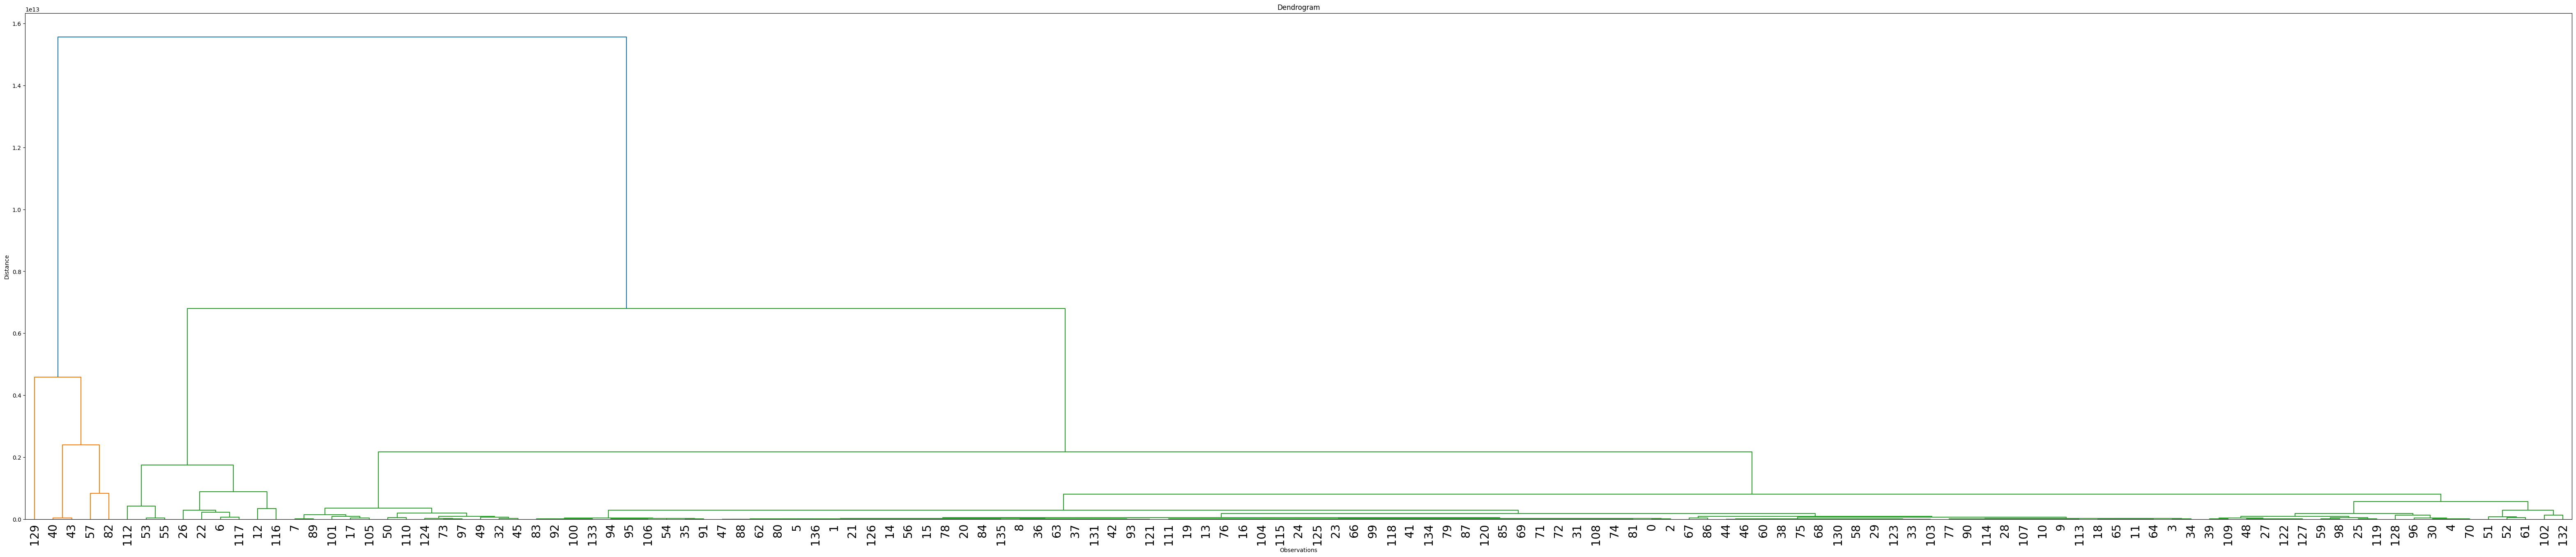

In [29]:
plt.figure(figsize = (80,16))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 20,);

In [30]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")


In [31]:
X[129]

array([1.7170000e-01, 7.3300000e+02, 1.3300000e+02, 1.5000000e+01,
       4.4000000e+01, 2.4100000e+02, 3.1200000e+02, 4.9000000e+01,
       2.2700000e+02, 5.0000000e+03, 8.9000000e+01, 1.2600000e+02,
       3.5000000e+01, 8.8000000e+01, 2.0000000e+00, 1.0000000e+01,
       6.0000000e+00, 1.3000000e+01, 5.5100000e+10, 8.1260000e+12,
       4.6000000e+02, 9.1050000e+05, 1.6000000e+06, 2.5640000e+09,
       2.9948413e+07, 6.5105246e+07, 2.4361000e+05, 1.2429000e+04,
       3.2000000e+03, 4.4300000e+02])

In [32]:
real_df_t.loc[129,"Country"]

'United Kingdom'

In [33]:
X = np.delete(X, 129, axis=0)

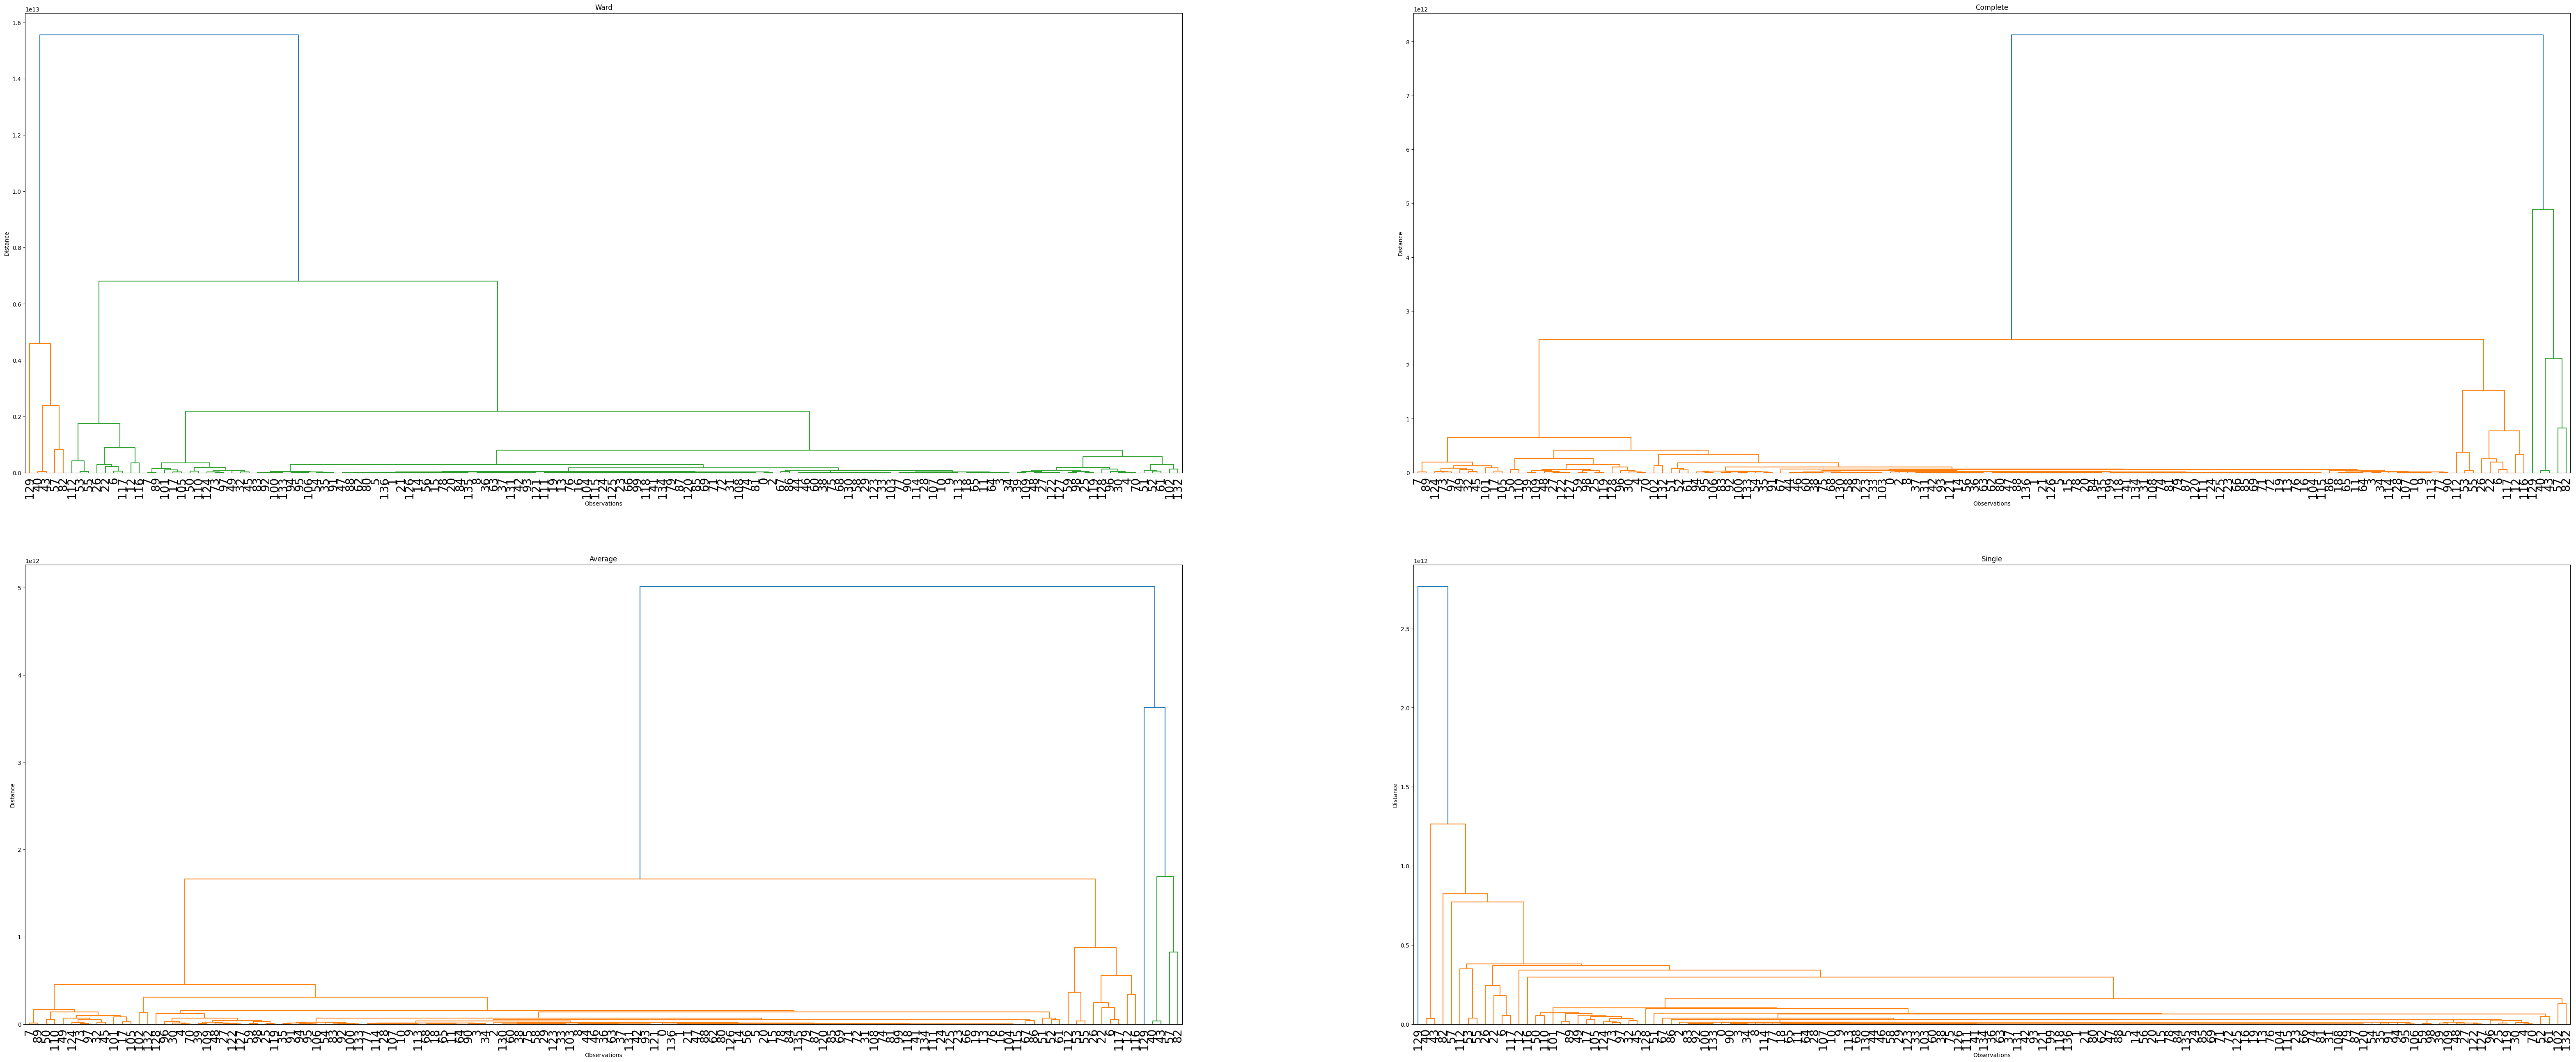

In [34]:

plt.figure(figsize = (80,32))
plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 20)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 20)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 20)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 20);